<a href="https://colab.research.google.com/github/miguelmccormickudg/Gravitational_housing_model/blob/main/correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos de 'aristas':
   Source                  Target      Type  Weight
0  Airbnb                    Adan  Directed     1.0
1  Airbnb                  Adrian  Directed     2.0
2  Airbnb                     Ale  Directed     1.0
3  Airbnb               Alejandra  Directed     4.0
4  Airbnb  Alejandra Grupo Bosque  Directed     3.0

Datos de 'propiedades (1)':
     Listing_id          location/title room_Category  Listing_Rating  \
0  3.628271e+07                  Ajijic   entire_home            4.96   
1  3.897688e+07                  Ajijic   entire_home            4.85   
2  3.946315e+07                  Ajijic   entire_home            4.81   
3  1.336500e+18  San Antonio Tlayacapan   entire_home            0.00   
4  3.759167e+07                  Ajijic   entire_home            4.78   

   Reviews  maxGuest                                               name  \
0    165.0      15.0  Exceptional house. Pool, jacuzzi, Billiards an...   
1     47.0       2.0        CASA MATEO - In the he

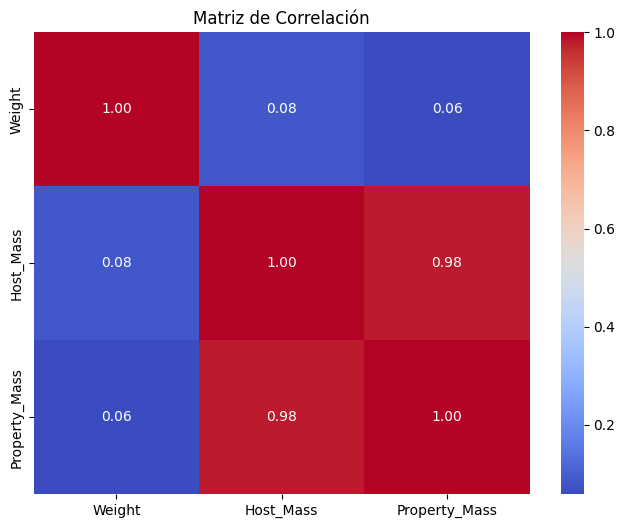

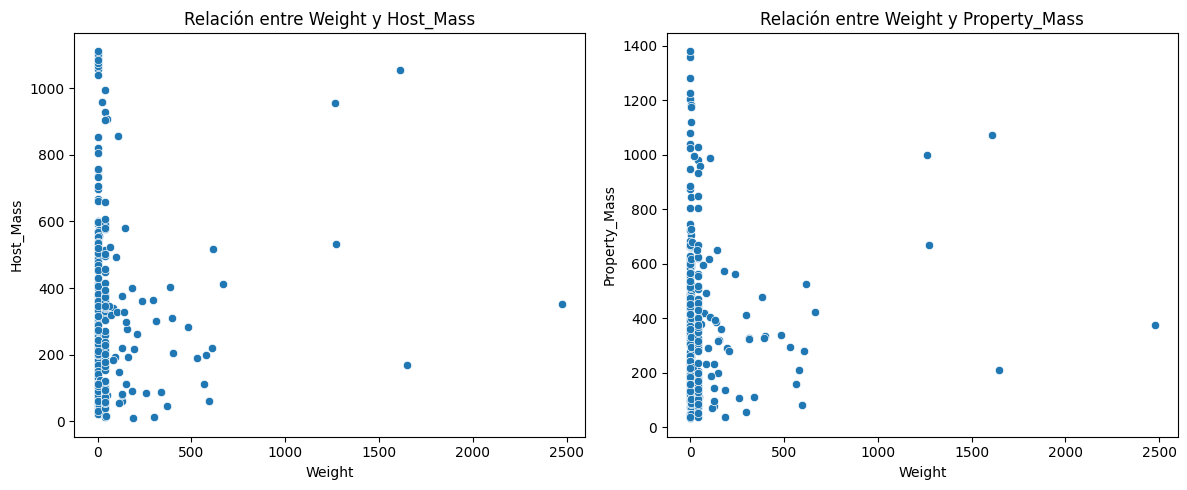


Correlación de Pearson entre Weight y Host_Mass: -0.07, p-value: 0.0615
Correlación de Pearson entre Weight y Property_Mass: -0.08, p-value: 0.0198


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Cargar los archivos CSV
# Asegúrate de que los nombres de los archivos coincidan exactamente
aristas = pd.read_csv('/content/aristas.csv')  # Archivo con la columna 'Weight'
propiedades = pd.read_csv('/content/propiedades (1).csv')  # Archivo con 'Host_Mass' y 'Property_Mass'

# Verificar las primeras filas de cada archivo
print("Datos de 'aristas':")
print(aristas.head())

print("\nDatos de 'propiedades (1)':")
print(propiedades.head())

# Asegurarse de que las columnas existen
if 'Weight' not in aristas.columns:
    raise ValueError("La columna 'Weight' no está presente en el archivo 'aristas'")
if 'Host_Mass' not in propiedades.columns or 'Property_Mass' not in propiedades.columns:
    raise ValueError("Las columnas 'Host_Mass' o 'Property_Mass' no están presentes en el archivo 'propiedades (1)'")

# Combinar los datos en función de algún identificador común (si es necesario)
# Si los archivos tienen una columna común (por ejemplo, un ID), úsala para unirlos.
# Por ejemplo: merged_data = pd.merge(aristas, propiedades, on='ID')
# Si no hay un identificador común, asumimos que las filas coinciden directamente
merged_data = pd.concat([aristas['Weight'].reset_index(drop=True),
                         propiedades[['Host_Mass', 'Property_Mass']].reset_index(drop=True)], axis=1)

# Verificar los datos combinados
print("\nDatos combinados:")
print(merged_data.head())

# Análisis estadístico básico
print("\nResumen estadístico de los datos combinados:")
print(merged_data.describe())

# Calcular la matriz de correlación
correlation_matrix = merged_data.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Gráficos de dispersión para visualizar las relaciones
plt.figure(figsize=(12, 5))

# Scatter plot entre Weight y Host_Mass
plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_data['Weight'], y=merged_data['Host_Mass'])
plt.title('Relación entre Weight y Host_Mass')
plt.xlabel('Weight')
plt.ylabel('Host_Mass')

# Scatter plot entre Weight y Property_Mass
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_data['Weight'], y=merged_data['Property_Mass'])
plt.title('Relación entre Weight y Property_Mass')
plt.xlabel('Weight')
plt.ylabel('Property_Mass')

plt.tight_layout()
plt.show()

# Pruebas estadísticas adicionales (opcional)
from scipy.stats import pearsonr

# Replace inf and NaN with a finite value (e.g., 0) before correlation calculation
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
merged_data.fillna(0, inplace=True)  # Replace NaN with 0 (or any other desired value)

# Correlación de Pearson entre Weight y Host_Mass
corr_weight_host, p_value_weight_host = pearsonr(merged_data['Weight'], merged_data['Host_Mass'])
print(f"\nCorrelación de Pearson entre Weight y Host_Mass: {corr_weight_host:.2f}, p-value: {p_value_weight_host:.4f}")

# Correlación de Pearson entre Weight y Property_Mass
corr_weight_property, p_value_weight_property = pearsonr(merged_data['Weight'], merged_data['Property_Mass'])
print(f"Correlación de Pearson entre Weight y Property_Mass: {corr_weight_property:.2f}, p-value: {p_value_weight_property:.4f}")